In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
train = pd.read_csv('./data/basic_features/train.csv', index_col=0)
test = pd.read_csv('./data/basic_features/test.csv', index_col=0)

In [21]:
train_X = train.drop('target', axis=1)
train_Y = train[['target']]
test_X = test.drop('target', axis=1)
test_Y = test[['target']]

In [22]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier()

In [23]:
dt.fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
train_error = (dt.predict(train_X).reshape(-1,1) == train_Y).sum() / len(train_Y)
test_error = (dt.predict(test_X).reshape(-1,1) == test_Y).sum() / len(test_Y)

In [25]:
[train_error, test_error]

[target    0.989997
 dtype: float64, target    0.711316
 dtype: float64]

<h1> Hyper Parameters Tuning </h1>

In [26]:
train_errors = []
cnt = 0
test_errors = []
n_estimators = range(50, 150, 30)
for n_estimator in n_estimators:
    dt = RandomForestClassifier(max_depth=100, n_estimators=n_estimator)
    dt.fit(train_X, train_Y)
    train_error = ((dt.predict(train_X).reshape(-1,1) == train_Y).sum() / len(train_Y))['target']
    test_error = ((dt.predict(test_X).reshape(-1,1) == test_Y).sum() / len(test_Y))['target']
    train_errors.append(train_error)
    test_errors.append(test_error)
    cnt = cnt + 1
    print('\r {} %'.format(int((cnt / len(n_estimators)) * 100)), end='')
    

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


 25 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


 50 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


 75 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


 100 %

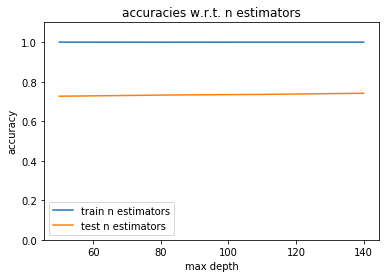

In [27]:
plt.title('accuracies w.r.t. n estimators')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.plot(n_estimators, train_errors, label='train n estimators')
plt.plot(n_estimators, test_errors, label='test n estimators')
plt.ylim(0,1.1)
plt.legend()

In [28]:
[min(train_errors), min(test_errors)]


[0.9997142040583024, 0.7263279445727483]